In [45]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from matplotlib import pyplot as plt
import nltk
import os



data_training = pd.read_csv("training_variants.csv",sep=",")
data_test = pd.read_csv("test_variants.csv",sep=",")
print(data_training.head())

file = open("training_text.csv", "rU")
file.readline() #ignore first line
no_id = sum(1 for line in open("training_text.csv","rU"))-1
print(no_id)
data_text = pd.DataFrame()
counter = 0
for line in file:
    data_text = data_text.append({'ID': line.split("||")[0] , 'TEXT': line.split("||")[1]}, ignore_index=True)

print(data_text.head())



data_text['ID'] = data_text['ID'].astype('int')
data_text = pd.merge(data_text,data_training,how='inner', on=['ID'])
print(data_text['Class'])


   ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 'U' mode is deprecated
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: 'U' mode is deprecated


3321
  ID                                               TEXT
0  0  Cyclin-dependent kinases (CDKs) regulate a var...
1  1   Abstract Background  Non-small cell lung canc...
2  2   Abstract Background  Non-small cell lung canc...
3  3  Recent evidence has demonstrated that acquired...
4  4  Oncogenic mutations in the monomeric Casitas B...
0       1
1       2
2       2
3       3
4       4
5       4
6       5
7       1
8       4
9       4
10      4
11      4
12      4
13      4
14      5
15      4
16      1
17      4
18      5
19      4
20      6
21      4
22      4
23      4
24      4
25      4
26      4
27      4
28      7
29      4
       ..
3291    7
3292    7
3293    1
3294    7
3295    4
3296    7
3297    4
3298    4
3299    4
3300    4
3301    4
3302    4
3303    4
3304    4
3305    4
3306    1
3307    1
3308    7
3309    1
3310    7
3311    4
3312    4
3313    4
3314    6
3315    4
3316    4
3317    1
3318    1
3319    4
3320    4
Name: Class, Length: 3321, dtype: int64


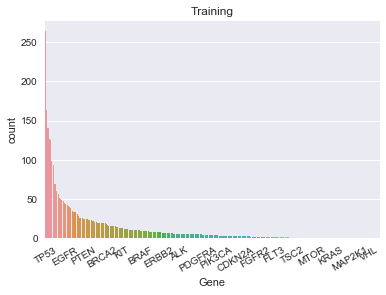

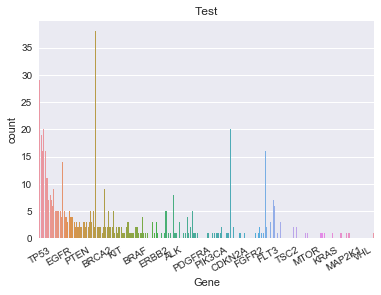

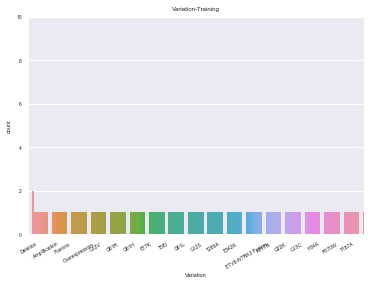

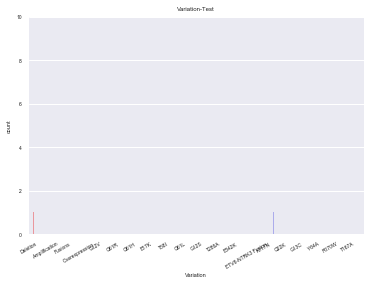

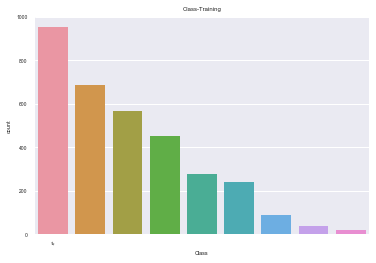

In [65]:
import seaborn as sns
import matplotlib.ticker as ticker
sns.set(font_scale = 1)
training = sns.countplot(x="Gene", data=data_training,order = data_training['Gene'].value_counts().index)
training.xaxis.set_major_locator(ticker.MultipleLocator(15))
training.set_xticklabels(training.get_xticklabels(),rotation=30)
training.set_title('Training')
plt.savefig("training_gene.png")
plt.show()

sns.set(font_scale = 1)
training = sns.countplot(x="Gene", data=data_test,order = data_training['Gene'].value_counts().index)
training.xaxis.set_major_locator(ticker.MultipleLocator(15))
training.set_xticklabels(training.get_xticklabels(),rotation=30)
training.set_title('Test')
plt.savefig("test_gene.png")
plt.show()


sns.set(font_scale = 0.5)
training = sns.countplot(x="Variation", data=data_training,order = data_training['Variation'].value_counts().index)
training.xaxis.set_major_locator(ticker.MultipleLocator(150))
training.set_xticklabels(training.get_xticklabels(),rotation=30)
training.set_title('Variation-Training')
training.set(ylim=(0, 10))
plt.savefig("training_variation.png")
plt.show()



sns.set(font_scale = 0.5)
training = sns.countplot(x="Variation", data=data_test,order = data_training['Variation'].value_counts().index)
training.xaxis.set_major_locator(ticker.MultipleLocator(150))
training.set_xticklabels(training.get_xticklabels(),rotation=30)
training.set_title('Variation-Test')
training.set(ylim=(0, 10))
plt.savefig("test_variation.png")
plt.show()


sns.set(font_scale = 0.5)
training = sns.countplot(x="Class", data=data_training,order = data_training['Class'].value_counts().index)
training.xaxis.set_major_locator(ticker.MultipleLocator(150))
training.set_xticklabels(training.get_xticklabels(),rotation=30)
training.set_title('Class-Training')
plt.savefig("Class_Training.png")
plt.show()